
Training SVM with linear kernel...
Accuracy: 0.5223
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.59      0.56      0.57       428
           6       0.49      0.78      0.60       567
           7       0.00      0.00      0.00       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.52      1300
   macro avg       0.15      0.19      0.17      1300
weighted avg       0.41      0.52      0.45      1300



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

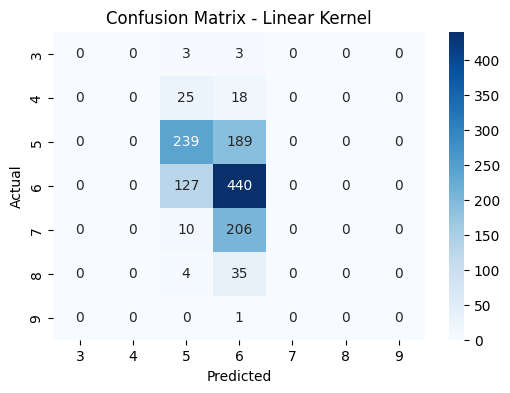


Training SVM with poly kernel...
Accuracy: 0.5323
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.05      0.09        43
           5       0.62      0.43      0.51       428
           6       0.50      0.82      0.62       567
           7       0.55      0.19      0.28       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.33      0.21      0.21      1300
weighted avg       0.54      0.53      0.49      1300



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

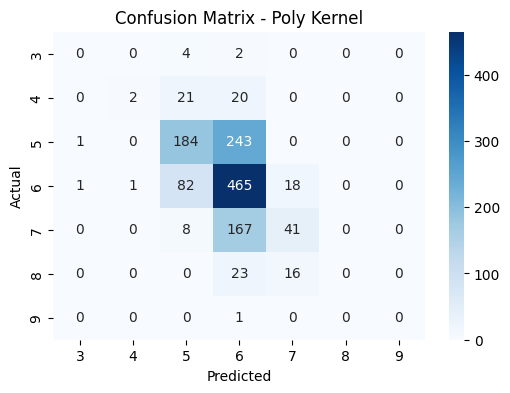

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Import SVM
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
red_wine = pd.read_csv("/Users/lakshayarora/Downloads/wine+quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("/Users/lakshayarora/Downloads/wine+quality/winequality-white.csv", sep=";")

# Add a feature to distinguish wine types
red_wine["wine_type"] = 0  # 0 for red wine
white_wine["wine_type"] = 1  # 1 for white wine

# Combine datasets
wine_data = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)

# Define features and target
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Function to train and evaluate SVM with a given kernel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to train and evaluate SVM with a given kernel
def train_and_evaluate_svm(kernel_name, degree=3):
    print(f"\nTraining SVM with {kernel_name} kernel...")
    
    # Initialize the model based on kernel
    if kernel_name == "poly":
        model = SVC(kernel=kernel_name, degree=degree, random_state=42)  # Polynomial kernel
    else:
        model = SVC(kernel=kernel_name, random_state=42)  # Linear or RBF kernel
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {kernel_name.capitalize()} Kernel")
    plt.show()

# Train and evaluate SVM with linear kernel
train_and_evaluate_svm(kernel_name="linear")

# Train and evaluate SVM with polynomial kernel (degree=3 by default)
train_and_evaluate_svm(kernel_name="poly", degree=3)
